<a href="https://colab.research.google.com/github/khalid9916/khalidwastaken.com/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.cluster import KMeans  # for clustering
from sklearn.tree import DecisionTreeClassifier  # for decision tree mining
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from treeviz import tree_print  # to print decision tree

In [0]:
file_11 = 'ionosphere.csv'
df = pd.read_csv(file_11)

FileNotFoundError: ignored

In [0]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,NaN,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,NaN,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,NaN,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,NaN,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,NaN,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,NaN,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,NaN,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,NaN,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [0]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
var0     351 non-null int64
var1     351 non-null int64
var2     351 non-null float64
var3     351 non-null float64
var4     351 non-null float64
var5     314 non-null float64
var6     351 non-null float64
var7     351 non-null float64
var8     211 non-null float64
var9     351 non-null float64
var10    351 non-null float64
var11    351 non-null float64
var12    351 non-null float64
var13    351 non-null float64
var14    351 non-null float64
var15    351 non-null float64
var16    279 non-null float64
var17    351 non-null float64
var18    351 non-null float64
var19    351 non-null float64
var20    351 non-null float64
var21    351 non-null float64
var22    351 non-null float64
var23    214 non-null float64
var24    218 non-null float64
var25    351 non-null float64
var26    351 non-null float64
var27    351 non-null float64
var28    351 non-null float64
var29    351 non-null float64

In [0]:
df.describe(include='all')

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34
count,351.000000,351.0,351.000000,351.000000,351.000000,314.000000,351.000000,351.000000,211.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,279.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,214.000000,218.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.122292,0.550095,0.119360,0.494896,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.379069,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.055837,0.436902,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,NaN
std,0.311155,0.0,0.497708,0.441435,0.519862,0.465014,0.492654,0.520750,0.508940,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.620083,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.521027,0.557801,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,NaN
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024545,0.211310,-0.054840,0.112305,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.329132,0.031340,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,NaN
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022930,0.728730,0.014710,0.655740,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.564660,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,NaN
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.349527,0.969240,0.445675,0.933525,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.934625,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164895,0.914805,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,NaN


In [0]:
X_df = df.loc[:, 'var0':'var33']
y_df = df.loc[:, 'var34']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.1, stratify=y_df, random_state=1)
X_train.shape, X_test.shape

((315, 34), (36, 34))

In [0]:
X_train.describe(include='all')

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33
count,315.000000,315.0,315.000000,315.000000,315.000000,281.000000,315.000000,315.000000,193.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,250.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,193.000000,199.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,0.888889,0.0,0.630803,0.049884,0.592689,0.126151,0.541141,0.142663,0.493933,0.187397,0.465893,0.169998,0.387693,0.090388,0.330248,0.089034,0.369106,-0.005231,0.349353,-0.017739,0.326546,0.001670,0.352063,-0.045277,0.437053,-0.073922,0.539972,-0.073083,0.363782,-0.026366,0.340666,-0.000142,0.341338,0.031491
std,0.314770,0.0,0.508777,0.448516,0.535552,0.474584,0.503488,0.520040,0.512804,0.488432,0.567717,0.497402,0.630786,0.496908,0.658478,0.455625,0.625194,0.503021,0.634232,0.518955,0.614056,0.516916,0.611630,0.531070,0.566271,0.509599,0.527861,0.555491,0.585774,0.506329,0.584983,0.513068,0.528173,0.458224
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.440970,-0.060355,0.395440,-0.017730,0.211310,-0.035050,0.114700,-0.048075,0.000000,-0.036995,0.000000,-0.071595,0.000000,-0.065420,0.000000,-0.220955,0.000000,-0.208540,-0.000015,-0.251480,-0.000155,-0.316540,0.056830,-0.332390,0.298070,-0.475995,0.000000,-0.237960,0.000000,-0.242595,0.000000,-0.119760
50%,1.000000,0.0,0.877720,0.025200,0.823320,0.029420,0.727270,0.019540,0.655740,0.016390,0.645280,0.032810,0.637870,0.029080,0.583330,0.000000,0.584605,0.000000,0.576190,0.000000,0.486420,0.000000,0.531760,0.000000,0.568110,-0.014780,0.708240,-0.017690,0.489040,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.210425,1.000000,0.373790,0.973550,0.500685,0.945900,0.575670,0.953665,0.531880,0.950745,0.379500,0.919330,0.329455,0.939170,0.200595,0.899265,0.141410,0.893025,0.183695,0.920820,0.181820,0.918580,0.161065,1.000000,0.157805,0.879100,0.154075,0.858760,0.200120,0.802215,0.173230
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X_train.isnull().sum()

var0       0
var1       0
var2       0
var3       0
var4       0
var5      34
var6       0
var7       0
var8     122
var9       0
var10      0
var11      0
var12      0
var13      0
var14      0
var15      0
var16     65
var17      0
var18      0
var19      0
var20      0
var21      0
var22      0
var23    122
var24    116
var25      0
var26      0
var27      0
var28      0
var29      0
var30      0
var31      0
var32      0
var33      0
dtype: int64

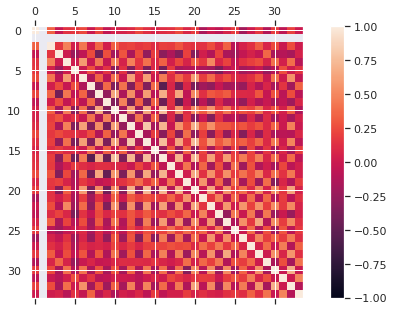

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(X_train.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)

In [0]:
#question 7 
df.LogisticRegression()

AttributeError: ignored